In [1]:
!python -V

Python 3.12.9


In [3]:
import pandas as pd

In [4]:
import pickle

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

In [10]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime 

In [11]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df = df[df.duration >= 1]
df = df[df.duration <= 60]

df[categorical] = df[categorical].astype(str)

train_dicts = df[categorical].to_dict(orient='records')

In [12]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

rmse = root_mean_squared_error(y_train, y_pred)
print(f"RMSE: {rmse}")

RMSE: 9.775596032221966


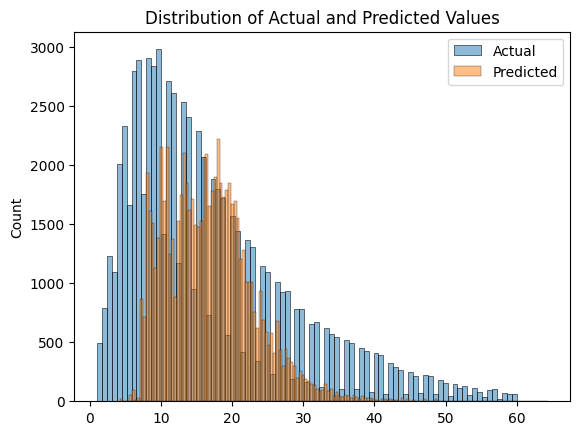

In [13]:
#build a distribution plot of the actual and predicted values
#make the plot transparent and add a legend and a title and fill the area under the curve in both plots
sns.histplot(y_train, label='Actual', alpha=0.5)
sns.histplot(y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.title('Distribution of Actual and Predicted Values')
plt.show()

In [14]:
def read_data(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime 
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[df.duration >= 1]
    df = df[df.duration <= 60]
    return df

In [15]:
df_train = read_data('./data/green_tripdata_2021-01.parquet')
df_val = read_data('./data/green_tripdata_2021-02.parquet')


In [16]:
len(df_train), len(df_val)

(73908, 61921)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73908 entries, 0 to 76517
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               73908 non-null  int64         
 1   lpep_pickup_datetime   73908 non-null  datetime64[us]
 2   lpep_dropoff_datetime  73908 non-null  datetime64[us]
 3   store_and_fwd_flag     38175 non-null  object        
 4   RatecodeID             38175 non-null  float64       
 5   PULocationID           73908 non-null  int64         
 6   DOLocationID           73908 non-null  int64         
 7   passenger_count        38175 non-null  float64       
 8   trip_distance          73908 non-null  float64       
 9   fare_amount            73908 non-null  float64       
 10  extra                  73908 non-null  float64       
 11  mta_tax                73908 non-null  float64       
 12  tip_amount             73908 non-null  float64       
 13  tolls_

In [18]:
df_train['PU_DO'] = df_train['PULocationID'].astype(str) + '_' + df_train['DOLocationID'].astype(str)
df_val['PU_DO'] = df_val['PULocationID'].astype(str) + '_' + df_val['DOLocationID'].astype(str) 

categorical = ['PU_DO']
numerical = ['trip_distance']

dv = DictVectorizer()   

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse}")

RMSE: 7.480873294287806


/Users/inigo_ocariz/src/ml-zoomcamp-2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/inigo_ocariz/src/ml-zoomcamp-2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/inigo_ocariz/src/ml-zoomcamp-2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_


In [21]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [22]:
lr = Lasso(alpha=0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse}")

RMSE: 11.167283642115867


/Users/inigo_ocariz/src/ml-zoomcamp-2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/inigo_ocariz/src/ml-zoomcamp-2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/inigo_ocariz/src/ml-zoomcamp-2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
